Assignment 3 (due on 11/22)

Student:夏侯露钰（12132226），Gtihub：XH1111123

批改人：赵淑慧

得分：51/60


# PS1. Niño 3.4 index
20/20  
1. Niño 3.4范围正确，计算月度气候态（多年平均每月）的SST，并获取SST距平。10/10
2. 根据厄尔尼诺和拉尼娜事件定义，模仿例图（x轴月尺度时间，y轴温度距平，黑线表示三个月滑动平均的距平值，红柱表示正距平，蓝柱表示负距平，有两种事件的阈值水平线）进行绘图。10/10

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
%matplotlib inline

In [6]:
#1.1
#加载所需的数据
data1 = xr.open_dataset(r"C:\Program1\jupyter_notebook\ese5023\NOAA_NCDC_ERSST_v3b_SST.nc")
# data1 = xr.open_dataset(r"D:\ESE5023\NOAA_NCDC_ERSST_v3b_SST.nc")
#选择Niño 3.4 region，经纬度范围(5N-5S, 170W-120W)，西经的换算180+|180-x|，并按月份分组
data_range=data1.sst.sel(lat=slice(-5,5),lon=slice(190,240)).groupby('time.month')
#求该区域的月平均
sst_month_mean =data_range.mean(dim=['lat', 'lon','time'])
#相减求该区域的异常值
sst_anom=data_range-sst_month_mean
#求3个月的滑动平均（ 3-month running mean）
#窗口大小为3（每个月1个数据），窗口的标签设置为居中，每个窗口内最少包含的观测值的数量为2（为了头尾数据不为空）
sst_mean_3=sst_anom.rolling(time=3, center=True, min_periods=2).mean()
#得到异常值
sst_anomalies=sst_mean_3.mean(dim=['lat', 'lon'])

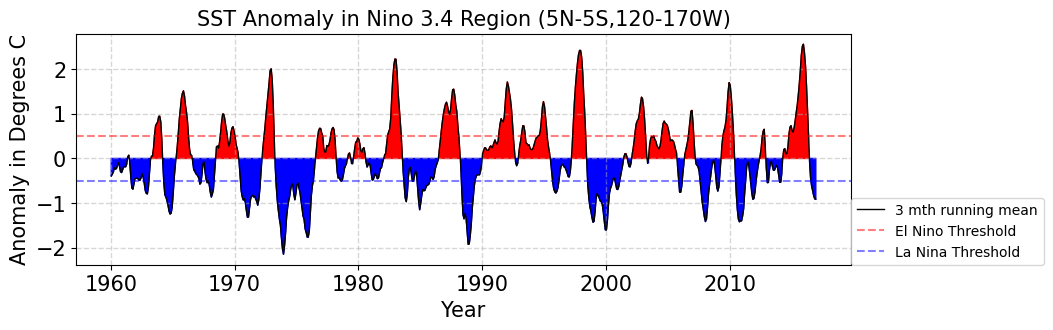

In [259]:
#1.2
#调整画布大小，线段颜色为黑色，线粗细为1
plt.figure(figsize=(10,3),dpi=100)
plt.plot(data1.sst.time,sst_anomalies,'k',linewidth=1, label = '3 mth running mean')
#调整xy轴
plt.xticks(fontsize=15)
plt.yticks(ticks=np.arange(-3,4,1), fontsize=15)
#画网格线
plt.grid(linestyle='--', linewidth=1, alpha=0.5)
#加标题
plt.title('SST Anomaly in Nino 3.4 Region (5N-5S,120-170W)', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Anomaly in Degrees C', fontsize=15)
#填充红蓝色
plt.fill_between(data1.sst.time.to_numpy(),sst_anomalies,where=(sst_anomalies>0),color='red')
plt.fill_between(data1.sst.time.to_numpy(),sst_anomalies,where=(sst_anomalies<0),color='blue')
#添加±0.5的标记线
plt.axhline(y = 0.5, ls = '--', color = 'red', alpha = 0.5, label = 'El Nino Threshold')
plt.axhline(y = -0.5, ls = '--', color = 'blue', alpha = 0.5, label = 'La Nina Threshold')
#在右下角添加图例
plt.legend(bbox_to_anchor=(1, 0), loc=3, borderaxespad=0)

# PS2. Earth’s energy budget
22/30  
1. 绘制按时间平均的全天况下的TOA长波、短波、太阳辐射的2D图，将三者加和并可视化确认他们的和与TOA净通量相等。——题目表述有误，toa_net=solar_rad-longwave-shortwave；缺少图名和变量单位。3/5
2. 计算并确认TOA入射太阳辐射、出射长波、出射短波与示例图中的信息相符合，注意计算每个格网的实际面积。——图上所写incoming solar radiation为340.4，total reflected solar radiation即出射短波为99.9，total outgoing infrared radiation即出射长波为239.9，单位都是W/m^-2。7/10
3. 计算并绘制每1度纬度带上的净辐射总量，注意正确的单位。——计算净辐射总量需乘面积，得到结果单位为W；画图最好是横轴纬度纵轴辐射总量，图需要有图名。3/5
4. 计算并绘制低云区和高云区的按时间平均的出射短波和长波辐射的2D合成图。注意低云区和高云区的定义。5/5
5. 计算在高云区和低云区合成的短波和长波辐射的总体平均值，并回答云层对短波和长波辐射的总体影响是怎样的？——global mean应该按照面积或纬度权重计算。4/5

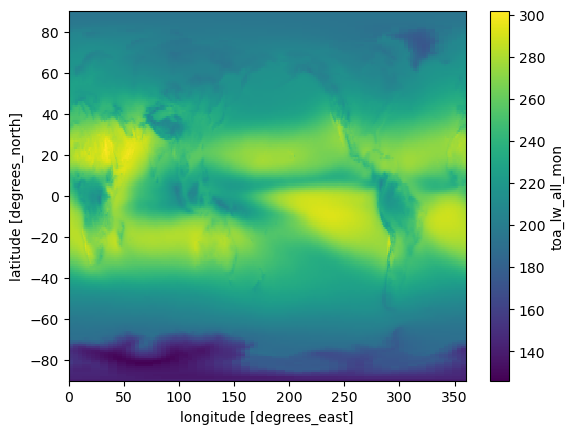

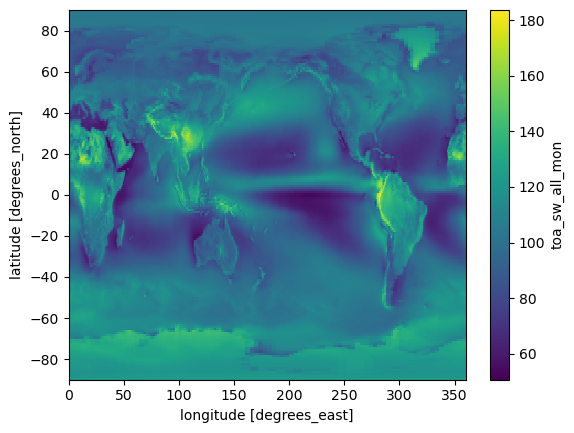

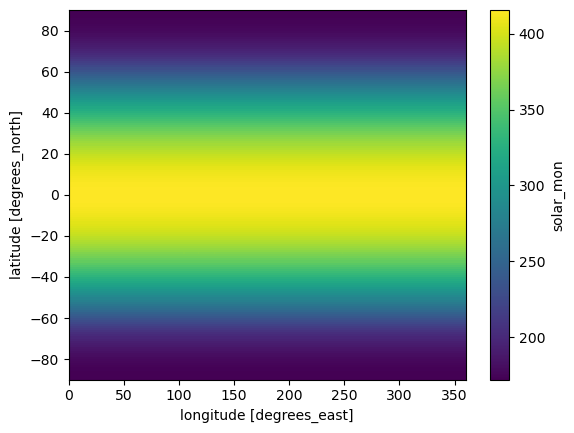

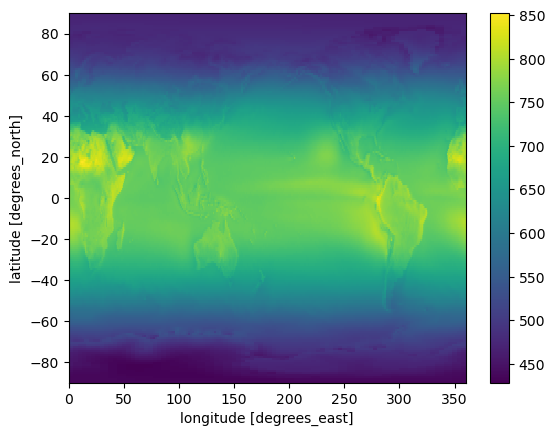

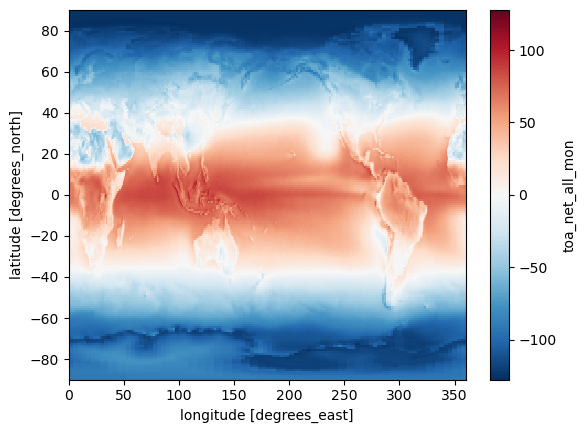

In [7]:
#2.1
#加载所需的数据
data2 = xr.open_dataset(r"C:\Program1\jupyter_notebook\ese5023\CERES_EBAF-TOA_200003-201701.nc")
# data2 = xr.open_dataset(r"D:\ESE5023\CERES_EBAF-TOA_200003-201701.nc")
# Time-mean TOA longwave
data2.toa_lw_all_mon.mean(dim='time').plot()
plt.show()
# Time-mean TOA shortwave
data2.toa_sw_all_mon.mean(dim='time').plot()
plt.show()
# 太阳辐射 Solar radiation
data2.solar_mon.mean(dim='time').plot()
plt.show()
# 以上三个相加 Add up the three variables above
data2_add=data2.toa_lw_all_mon.mean(dim='time')+data2.toa_sw_all_mon.mean(dim='time')+data2.solar_mon.mean(dim='time')
data2_add.plot()
plt.show()
#与TOA net flux比较
data2.toa_net_all_mon.mean(dim='time').plot()
plt.show()

In [11]:
#2.2
#weights
weights = np.cos(np.deg2rad(data2.lat))
data2.solar_mon.mean(dim = 'time').weighted(weights).sum()  #太阳辐射：14037950
data2.toa_lw_all_mon.mean(dim = 'time').weighted(weights).sum()  #长波：9911886
data2.toa_sw_all_mon.mean(dim = 'time').weighted(weights).sum()  #短波：4089832.2
#太阳辐射总量=14037950，短波总量+长波总量=14001718，approximately match

# TA corrected
total_incoming_solar=data2.solar_mon.mean(dim = 'time').weighted(weights).mean()
total_outgoing_longwave=data2.toa_lw_all_mon.mean(dim = 'time').weighted(weights).mean()
total_outgoing_shortwave=data2.toa_sw_all_mon.mean(dim = 'time').weighted(weights).mean()
print(f'TOA incoming solar: {total_incoming_solar:.01f} Wm-2.')
print(f'TOA outgoing longwave: {total_outgoing_longwave:.01f} Wm-2.')
print(f'TOA outgoing shortwave: {total_outgoing_shortwave:.01f} Wm-2.')

TOA incoming solar: 340.3 Wm-2.
TOA outgoing longwave: 240.3 Wm-2.
TOA outgoing shortwave: 99.1 Wm-2.


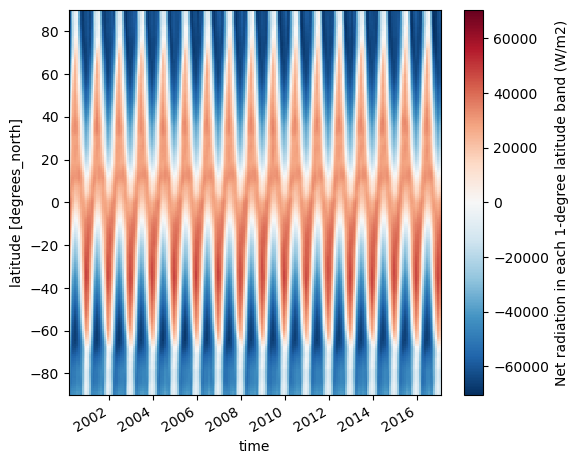

In [262]:
#2.3
#对纬度所在的所有经度范围加和，翻转（后续画图x轴为时间，y轴为纬度）
net_radiation=data2.toa_net_all_mon.sum(dim=['lon']).transpose()
#画图，备注单位“W/m2”
net_radiation.plot(figsize=(6,5),cbar_kwargs={'label':'Net radiation in each 1-degree latitude band (W/m2)'})

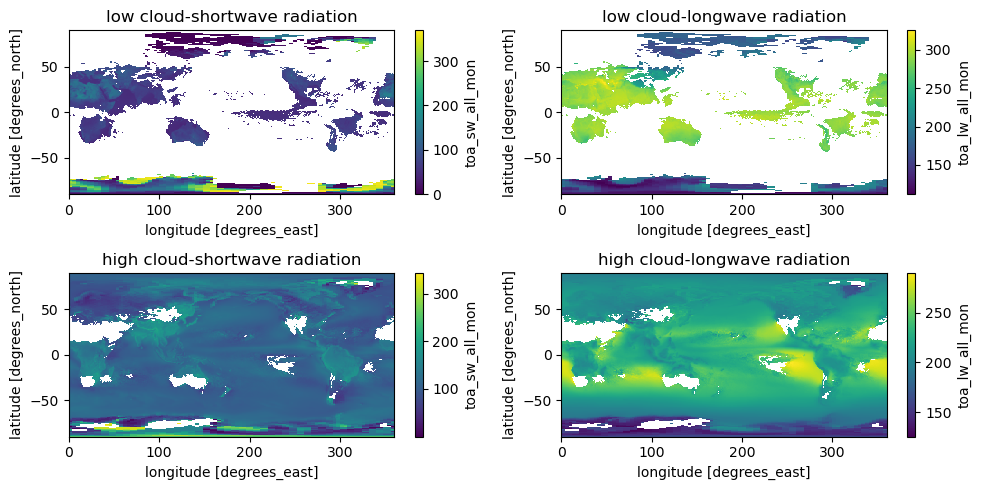

In [263]:
#2.4
#设置4个图
fig,axs= plt.subplots(2,2,figsize=(10, 5))
#low cloud area as ≤25%, high cloud area as ≥75%
low_short=data2.toa_sw_all_mon.where(data2.cldarea_total_daynight_mon<=25).mean(dim = 'time')
low_long=data2.toa_lw_all_mon.where(data2.cldarea_total_daynight_mon<=25).mean(dim = 'time')
high_short=data2.toa_sw_all_mon.where(data2.cldarea_total_daynight_mon>=75).mean(dim = 'time')
high_long=data2.toa_lw_all_mon.where(data2.cldarea_total_daynight_mon>=75).mean(dim = 'time')
#分别放入4个小图
low_short.plot(ax = axs[0,0])
low_long.plot(ax = axs[0,1])
high_short.plot(ax = axs[1,0])
high_long.plot(ax = axs[1,1])
#设置图标题low/high cloud - shortwave/longwave radiation
axs[0,0].set_title('low cloud-shortwave radiation')
axs[0,1].set_title('low cloud-longwave radiation')
axs[1,0].set_title('high cloud-shortwave radiation')
axs[1,1].set_title('high cloud-longwave radiation')
#画图
fig.tight_layout()

In [264]:
#2.5
low_short.mean() #88.81645
low_long.mean() #233.06702
high_short.mean() #114.74328
high_long.mean() #215.37349
# The increase in clouds increases shortwave radiation and decreases longwave radiation

<xarray.DataArray 'toa_lw_all_mon' ()>
array(215.37349, dtype=float32)

# PS3. Explore a netCDF dataset
9/10  
1. 绘制某个变量的时间序列，注意去掉月尺度的季节性周期。5/5
2. 用该数据集绘制至少5种不同的图。——图名和变量单位部分缺失；出现未命名变量sample。4/5

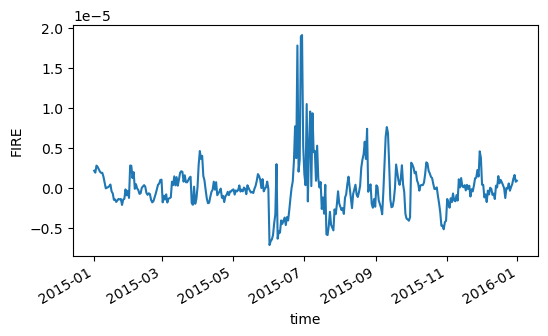

In [17]:
#3.1
#加载所需的数据
data3 = xr.open_dataset(r"D:\ESE5023\GEOSCarb_CASAGFED3v3_Fire.Daily.x720_y360.2015.nc", engine="netcdf4")
#按月分组
data3_1= data3.FIRE.groupby('time.month')
#相减求该区域的异常值
FIRE_anom=data3_1-data3_1.mean(dim='time')
FIRE_anomalies=FIRE_anom.mean(dim=['latitude', 'longitude'])
#画图
FIRE_anomalies.plot(figsize=(6, 3))

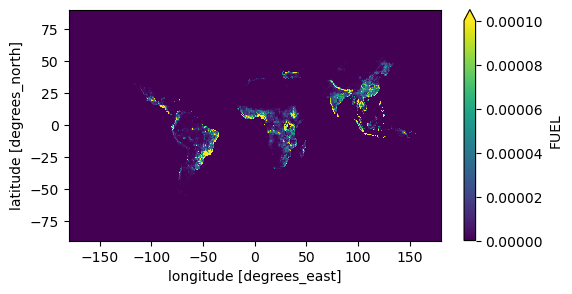

In [25]:
#3.2
#3.2.1：Fuel的平均值
FUEL_mean=data3.FUEL.mean(dim='time')
FUEL_mean.plot(figsize=(6, 3),vmin=0,vmax=0.0001)

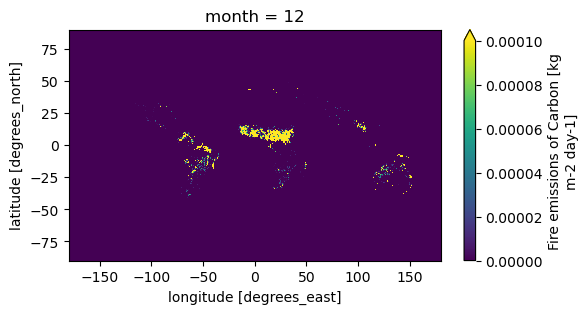

In [26]:
#3.2.2：Fire Assimilation of C在12月的平均值
FIRE_12_mean=data3.FIRE.groupby('time.month').mean().sel(month=12)
FIRE_12_mean.plot(figsize=(6, 3),vmin=0,vmax=0.0001)

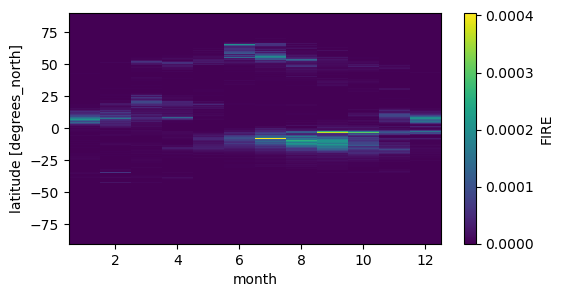

In [27]:
#3.2.3：不同纬度下Fire Assimilation of C的月平均
lat_mean=data3.FIRE.groupby('time.month').mean().mean(dim='longitude').transpose()
lat_mean.plot(figsize=(6, 3))

In [30]:
#3.2.4：数据最后一天（2015.12.31）Fire Assimilation of C大于0.001的地区
day_1=data3.FIRE.isel(time=-1)
day_1_FIRE=day_1.where(sample > 0.00000001)
day_1_FIRE.plot(figsize=(6, 3),vmin=0,vmax=0.001)

NameError: name 'sample' is not defined

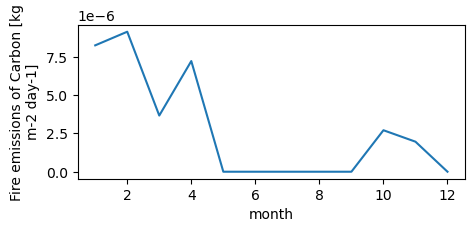

In [31]:
#3.2.5：广东地区（北纬20°～25°东经109°～117°）Fire Assimilation of C的月平均
gd_data3=data3.FIRE.sel(longitude=slice(109, 117), latitude=slice(20,25)).groupby('time.month').mean(dim=['latitude', 'longitude','time'])
gd_data3.plot(figsize=(5, 2))